In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\nisha\Downloads\archive (1)\Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [7]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [8]:
raw=df[['Review Text','Division Name']]

In [9]:
raw.head()

,Review Text,Division Name
0,Absolutely wonderful - silky and sexy and comf...,Initmates
1,Love this dress! it's sooo pretty. i happene...,General
2,I had such high hopes for this dress and reall...,General
3,"I love, love, love this jumpsuit. it's fun, fl...",General Petite
4,This shirt is very flattering to all due to th...,General


In [10]:
raw['Review Text']=raw['Review Text'].str.lower()
raw['Division Name']=raw['Division Name'].str.lower()

In [11]:
raw.isnull().sum()

Review Text      845
Division Name     14
dtype: int64

In [12]:
raw[raw['Review Text'].isnull()==True]

,Review Text,Division Name
92,NaN,general petite
93,NaN,general
98,NaN,general
135,NaN,general petite
142,NaN,general
...,...,...
23258,NaN,general
23301,NaN,general
23303,NaN,general
23470,NaN,general petite


In [13]:
raw=raw.dropna().reset_index(drop=True)

In [14]:
raw.isnull().sum()

Review Text      0
Division Name    0
dtype: int64

In [15]:
raw.shape

(22628, 2)

In [16]:
import re
pattern="[^a-z]"

In [17]:
raw['Review Text']=[re.sub(pattern," ",text)for text in raw['Review Text']]

In [18]:
raw.head()

,Review Text,Division Name
0,absolutely wonderful silky and sexy and comf...,initmates
1,love this dress it s sooo pretty i happene...,general
2,i had such high hopes for this dress and reall...,general
3,i love love love this jumpsuit it s fun fl...,general petite
4,this shirt is very flattering to all due to th...,general


In [19]:
raw[raw.duplicated()]

,Review Text,Division Name
9710,perfect fit and i ve gotten so many compliment...,initmates
10685,lightweight soft cotton top and shorts i thi...,initmates
12076,i purchased this and another eva franco dress ...,general
12876,perfect fit and i ve gotten so many compliment...,initmates
13760,i bought this shirt at the store and after goi...,general petite
21086,love love these jeans being short they come ...,general


In [20]:
raw=raw.drop_duplicates().reset_index(drop=True)

In [21]:
raw[raw.duplicated()]

,Review Text,Division Name


In [22]:
raw.shape

(22622, 2)

In [23]:
import plotly as px

In [24]:
cat_count=raw['Division Name'].value_counts().reset_index()
cat_count.columns=['Division Name','Count']

In [25]:
cat_count

,Division Name,Count
0,general,13363
1,general petite,7836
2,initmates,1423


In [26]:
round(raw['Division Name'].value_counts()/len(raw)*100,2)

Division Name
general           59.07
general petite    34.64
initmates          6.29
Name: count, dtype: float64

In [27]:
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt 

Division Name initmates


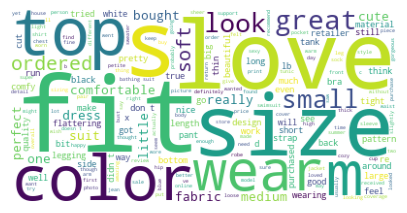

Division Name general


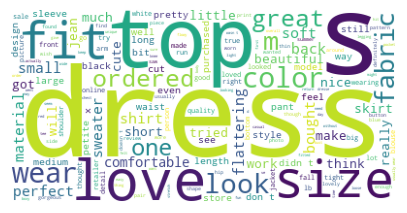

Division Name general petite


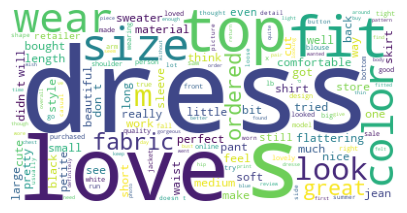

In [28]:
for sclass in raw['Division Name'].unique():
    stext=raw[raw['Division Name']==sclass]['Review Text']
    print('Division Name', sclass)
    wc=WordCloud(stopwords=STOPWORDS,background_color='white').generate(" ".join(stext))
    plt.figure(figsize=(5,6))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [29]:
X=raw['Review Text']
y=raw['Division Name']

In [30]:
display(X.head())
print()
display(y.head())

0    absolutely wonderful   silky and sexy and comf...
1    love this dress   it s sooo pretty   i happene...
2    i had such high hopes for this dress and reall...
3    i love  love  love this jumpsuit  it s fun  fl...
4    this shirt is very flattering to all due to th...
Name: Review Text, dtype: object

0         initmates
1           general
2           general
3    general petite
4           general
Name: Division Name, dtype: object

In [67]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [59]:
nltk.data.path.append(r'C:\Users\nisha\AppData\Roaming\nltk_data')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nisha\AppData\Roaming\nltk_data...


True

In [63]:
english_stop = set(stopwords.words("english"))

In [83]:
print('orginal english stopwords',len(english_stop))
lem=WordNetLemmatizer()

orginal english stopwords 198


In [85]:
corpus = []

# Looping Through Each Text
for text in X:
    # Tokenization
    words = [word.strip() for word in text.split()]
    # Droping Abnormal Words (like single character)
    words = [word for word in words if len(word)>=2]
    # Stopwords Remove
    words = [word for word in words if word not in english_stop]
    # Lemmatization
    words = [lem.lemmatize(word) for word in words]
    # Concating All Optimized words into text
    finaltext = " ".join(words)
    
    # Appending final text to corpus
    corpus.append(finaltext)

In [91]:
print(corpus[1:5])

['love dress sooo pretty happened find store glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite', 'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper', 'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment', 'shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt']


In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
import re
english=nltk.corpus.stopwords.words('english')
lem=WordNetLemmatizer()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
tfidf=TfidfVectorizer(max_features=10000)

In [97]:
tfidf

TfidfVectorizer(max_features=10000)

In [99]:
vector=tfidf.fit_transform(corpus).toarray()

In [101]:
vector

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
tfdf=pd.DataFrame(vector,columns=tfidf.get_feature_names_out())

In [107]:
tfdf

,aa,aaaaaaamazing,aaaaandidon,aaaaannnnnnd,aaaahmazing,aaaahs,aaahed,aame,ab,abbey,...,ziploc,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolander,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.124216,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(tfdf,y,test_size=20,random_state=123)

In [113]:
x_train.shape,y_train.shape

((22602, 10000), (22602,))

In [119]:
from sklearn.naive_bayes import MultinomialNB

In [121]:
mb=MultinomialNB()

In [123]:
mb

MultinomialNB()

In [127]:
mb.fit(x_train,y_train)

MultinomialNB()

In [129]:
from sklearn.preprocessing import OneHotEncoder

In [131]:
ohe=OneHotEncoder()

In [133]:
ohe

OneHotEncoder()

In [137]:
ytarin_model=ohe.fit_transform(np.array(y_train).reshape(-1,1)).toarray()

In [139]:
ytarin_model

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [144]:
ohe.categories_

[array(['general', 'general petite', 'initmates'], dtype=object)]

In [146]:
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras import layers

In [148]:
# Model

ann = keras.Sequential([
    # Input Layer
    layers.Input(shape=(x_train.shape[1],)),
    # Hidden Layers
    layers.Dense(5000, activation='relu'),
    layers.Dense(2500, activation='relu'),
    layers.Dense(1250, activation='relu'),
    layers.Dense(512, activation='relu'),
    # Output Layers
    layers.Dense(3, activation='softmax')
])


In [152]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5000)                │      50,005,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2500)                │      12,502,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1250)                │       3,126,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         640,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,275,801 (252.82 MB)

 Trainable params: 66,275,801 (252.82 MB)

 Non-trainable params: 0 (0.00 B)

In [154]:
ann.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', # Default
                       tf.keras.metrics.Precision(name='precision'), # Imbalance Metrics
                       tf.keras.metrics.Recall(name='recall')])

In [156]:
ann.fit(x_train, ytarin_model, validation_split=0.20, epochs=10, batch_size=32, verbose=1) # Add Callbacks if needed

Epoch 1/10
 26/566 ━━━━━━━━━━━━━━━━━━━━ 10:51 1s/step - accuracy: 0.5490 - loss: 0.9083 - precision: 0.5583 - recall: 0.4304

KeyboardInterrupt: 

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
ypred = nb.predict(x_test)

In [ ]:
plt.show(ConfusionMatrixDisplay.from_estimator(nb, x_test, y_test))

In [ ]:
print(classification_report(y_test, ypred))

In [ ]:
ypred = ann.predict(x_test).argmax(axis=1) # gets index of max prob for each sample
ypred

In [ ]:
# Mapping Indexes to Names

class_names = ohe.categories_[0]
ypred = [class_names[i] for i in ypred]
print(ypred[1:5])

In [ ]:
print(classification_report(y_test, ypred))

In [ ]:
# We can directly save above trained model from keras

ann.save("/kaggle/working/FashionstyleSentiment.keras") # Saving with .keras extension

In [ ]:
import joblib

joblib.dump(tfidf,"/kaggle/working/tfidf.pkl")

In [ ]:
# Loading Saved Model & Other Files

from tensorflow import keras
import joblib

model = keras.models.load_model("/kaggle/working/FashionstyleSentiment.keras")
tfidf = joblib.load("/kaggle/working/tfidf.pkl")

In [ ]:
# Pre-Requisites

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Taking Hindi and English Mixed Stopwords
english_stop = set(stopwords.words("hinglish"))




# Lemmatization
lem = WordNetLemmatizer()

# Function for cleaning & converting to vector of given text
def preprocess(text):
    text = text.lower()
    text = re.sub("[^a-z]"," ",text) # Punctuations Removal Pattern code - sub: substitute
    # Tokenization - Splitting Text into Words - Considering Words whic are not empty and having atleast more than 2 characters
    words = [word.strip() for word in text.split() if word.strip()!='' and len(word.strip())>=2]
    # Removing Stopwords and Applying Lemmatization
    words = [lem.lemmatize(word) for word in words if word not in english_stop]
    
    finaltext = ' '.join(words) # Attaching words as text to join corpus

    # Applying TF-IDF
    inptext = tfidf.transform([finaltext]).toarray()
    
    return inptext

In [ ]:
text="""love this dress   it s sooo pretty   i happened to find it in a store  and i m glad i did bc i never would have ordered it online bc it s petite   i bought a petite and am        i love the length on me  hits just a little below the knee   would definitely be a true midi on someone who is truly petite """

In [ ]:

modelinput = preprocess(text)
modelinput

In [ ]:
# Predictions

probs = [round(prob,3) for prob in model.predict(modelinput)[0]] 
print("Probabilities:", probs)
# Taking High Probability Index
index = np.argmax(probs)
classes = ['general', 'general petite', 'initmates'] # According to Ohe Object
print(f"Sentiment Detected: {classes[index].title()} \nWith Probability of {max(probs):.2f}")